In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
%matplotlib inline

In [4]:
df = pd.read_csv('1.csv')#load the csv
df = df.drop(['sell-or-buy','count','last_page','listing_datetime','results.listings','page'],axis = 1)#dropping the unncessary column

In [5]:
df.head(10)

,total,unit_price,quantity
0,3226,53089,2524
1,3226,53001,2483
2,3226,52984,2562
3,3226,52598,2463
4,3226,52750,2465
5,3226,51946,2511
6,3226,50000,2498
7,3226,52999,2426
8,3226,54062,2296
9,3226,53500,2413


In [6]:
df.describe()

,total,unit_price,quantity
count,1000.0,1000.000000,1000.000000
mean,3226.0,56344.106000,2346.029000
std,0.0,2980.085216,570.051548
min,3226.0,47356.000000,1562.000000
25%,3226.0,54607.250000,1983.750000
50%,3226.0,57205.000000,2204.500000
75%,3226.0,58586.000000,2484.000000
max,3226.0,60218.000000,4721.000000


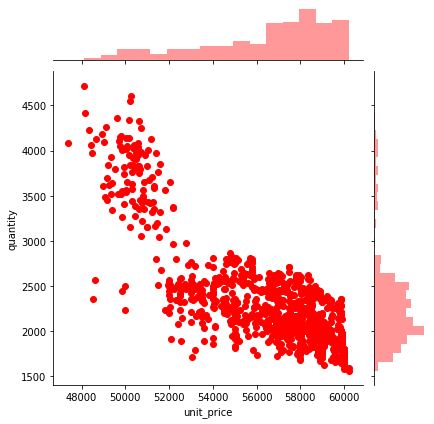

In [7]:
sns.jointplot(x='unit_price',y='quantity',data=df, color='red')
#From the scatter plot, we can see that the price is affected by the quantity of the unit.

In [8]:
new_df=df.mask((df - df.mean()).abs() > 2 * df.std())
new_df.describe()

,total,unit_price,quantity
count,1000.0,941.000000,922.000000
mean,3226.0,56768.658874,2213.324295
std,0.0,2520.063719,346.612786
min,3226.0,50406.000000,1562.000000
25%,3226.0,55049.000000,1967.000000
50%,3226.0,57484.000000,2168.500000
75%,3226.0,58699.000000,2432.500000
max,3226.0,60218.000000,3484.000000


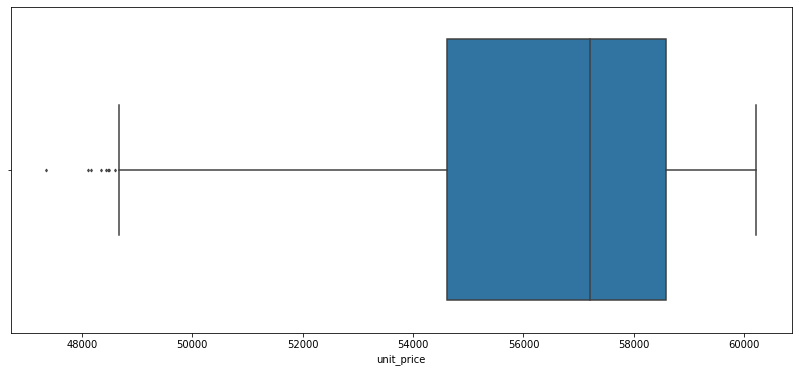

In [9]:
plt.figure(figsize=(14,6))
box_plot = sns.boxplot(x = 'unit_price', data = df, flierprops = dict(markerfacecolor = '0.50', markersize = 2))
medians = df.groupby(['unit_price']).median()
#From the boxplot we can see there are some outlier in the data

In [10]:
#Removing the outlier
new_df=df.mask((df - df.mean()).abs() > 2 * df.std())
df2 = new_df.dropna()
df2.describe()


,total,unit_price,quantity
count,910.0,910.000000,910.000000
mean,3226.0,56968.090110,2203.325275
std,0.0,2313.565553,333.174516
min,3226.0,50430.000000,1562.000000
25%,3226.0,55437.250000,1964.000000
50%,3226.0,57499.000000,2164.500000
75%,3226.0,58784.500000,2421.250000
max,3226.0,60218.000000,3465.000000


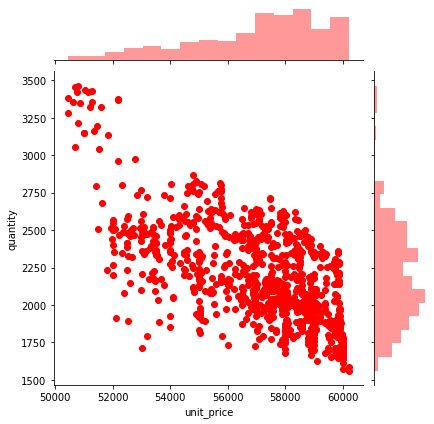

In [11]:
sns.jointplot(x='unit_price',y='quantity',data=df2, color='red')

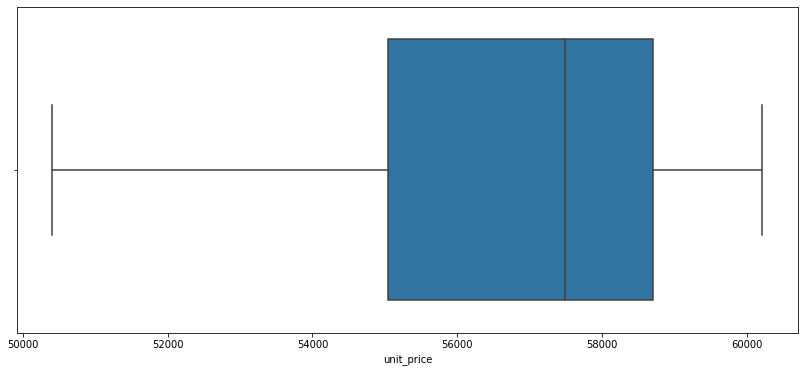

In [12]:
plt.figure(figsize=(14,6))
box_plot = sns.boxplot(x = 'unit_price', data = new_df, flierprops = dict(markerfacecolor = '0.50', markersize = 2))
#From the boxplot we can see there are no more outlier.

In [13]:
#Implementing linear regression model

In [14]:
X = df['quantity'].values.reshape(-1,1)
y = df['unit_price'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [30]:
RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(x_train,y_train)

regressor = LinearRegression()  
regressor.fit(x_train, y_train)

D:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred_rf = RandomForestModel.predict(x_test)
y_pred_lr= regressor.predict(x_test)

In [32]:
df_rf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rf.flatten()})
df_lr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lr.flatten()})

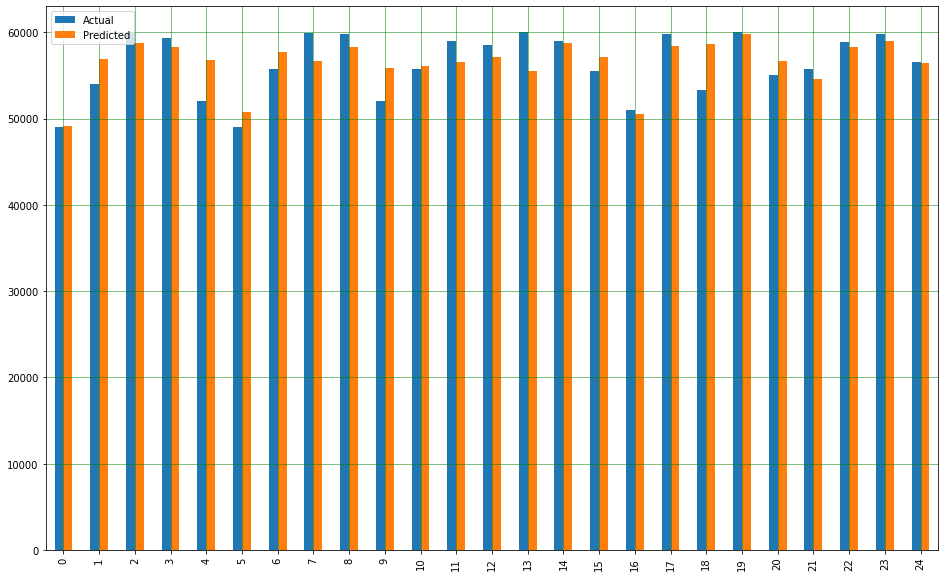

In [33]:
#comparing predicted values with actual value
df1 = df_rf.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

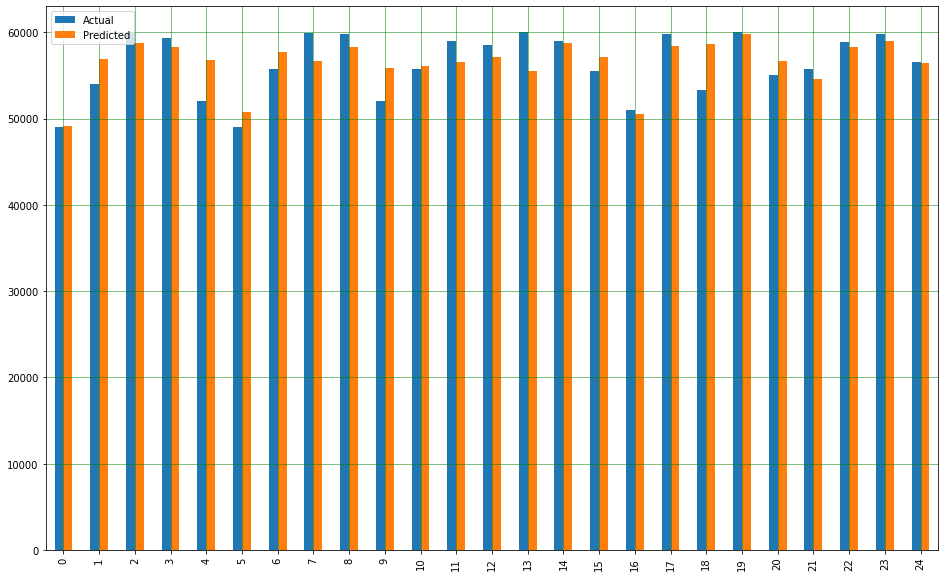

In [34]:
df2 = df_lr.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

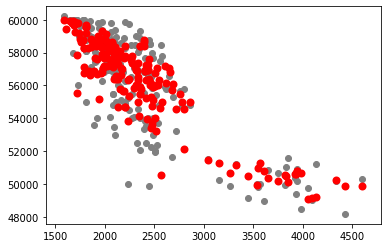

In [35]:
#plotting the prediction line on the test dataset (Random Forest)
plt.scatter(x_test, y_test,  color='gray')
plt.scatter(x_test, y_pred_rf, color='red', linewidth=2)
plt.show()

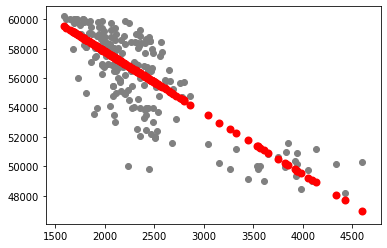

In [36]:
#plotting the prediction line on the test dataset (Linear Regression)
plt.scatter(x_test, y_test,  color='gray')
plt.scatter(x_test, y_pred_lr, color='red', linewidth=2)
plt.show()

In [39]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_lr = np.sqrt(mse_lr)
print("Random Forest RMSE: ",rmse_rf)
print("Linear Regression RMSE: ",rmse_lr)

Random Forest RMSE:  2183.70199741976
Linear Regression RMSE:  1884.4716536995802


In [40]:
mae_rf= metrics.mean_absolute_error(y_test,y_pred_rf)
mae_lr= metrics.mean_absolute_error(y_test,y_pred_lr)

print("Random Forest MAE: ",mae_rf)
print("Linear Regression MAE: ",mae_lr)

Random Forest MAE:  1663.9525702362912
Linear Regression MAE:  1483.9840174844296


In [41]:
#Linear Regression model is more suitable this data